In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import lfilter

accelerometer_data = pd.read_csv("/home/santiago/imu_/data_for_plotting/Accelerometer.csv")
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True

In [58]:
accelerometer_data

,time,seconds_elapsed,z,y,x
0,1721411575902510000,0.079510,-1.154643,0.095298,0.330126
1,1721411575915380200,0.092380,-0.471966,0.344560,0.160377
2,1721411575928226600,0.105227,0.109980,0.031700,0.397394
3,1721411575941097000,0.118097,0.423308,-0.061888,0.376715
4,1721411575953952500,0.130952,0.478264,-0.122960,0.356652
...,...,...,...,...,...
4846,1721411638625916200,62.802916,0.439963,0.030655,0.116260
4847,1721411638638763300,62.815763,0.384171,0.105888,0.243845
4848,1721411638651636200,62.828636,-0.025666,0.214166,0.244906
4849,1721411638664493600,62.841494,-0.069935,0.178290,0.292625


In [59]:
import scipy.integrate as it

In [125]:
list_x = lfilter(b, a, lfilter(b, a, accelerometer_data.x.tolist()))
list_y = lfilter(b, a, lfilter(b, a, accelerometer_data.y.tolist()))
list_z = lfilter(b, a, lfilter(b, a, accelerometer_data.z.tolist()))
sec_elapsed = gyro_data.seconds_elapsed.tolist()
list_sec = gyro_data.seconds_elapsed.tolist()
time_gap = (sec_elapsed[1]-sec_elapsed[0])

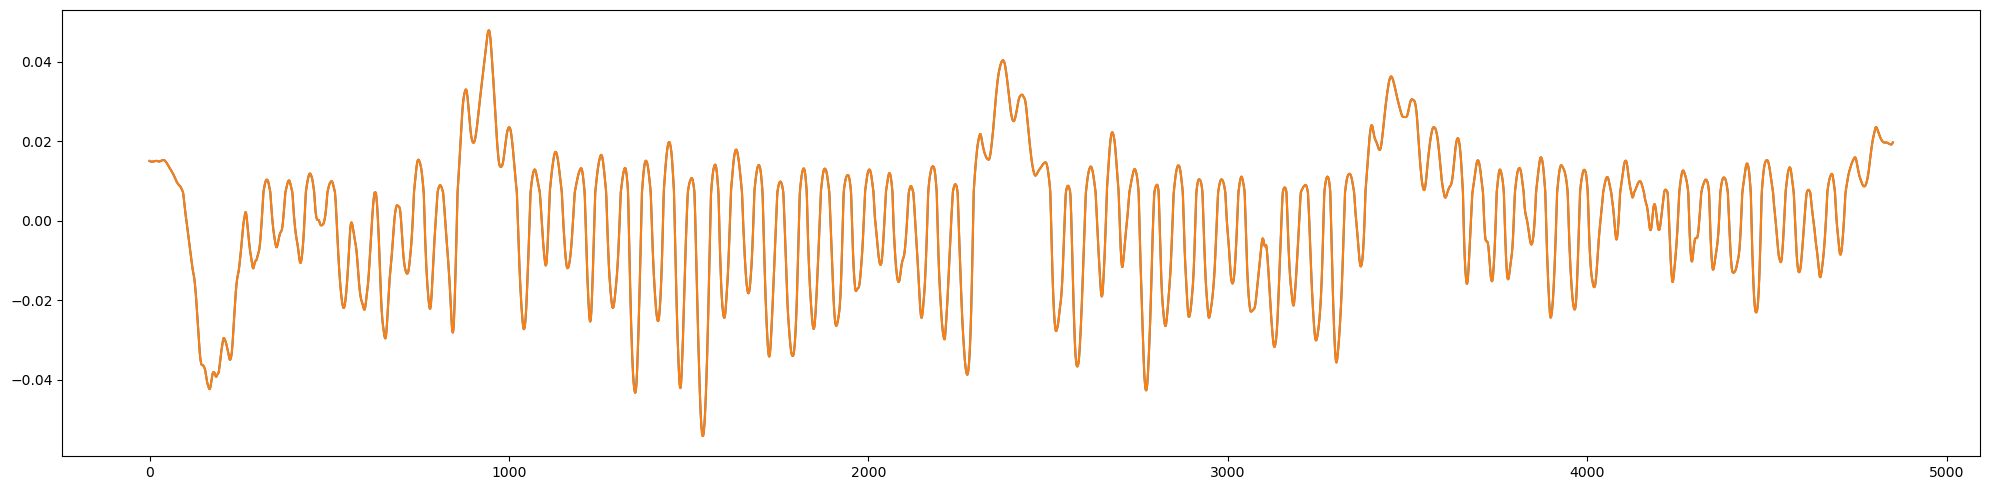

In [136]:
#plt.plot(list_z)
z_average = np.average(list_z)
new_list_z = []
for z in list_z:
    if z > 0:
        z = z_average + 1/3*z
    new_list_z.append(z)
#plt.plot(new_list_z)
plt.plot(new_list_z-np.average(new_list_z))
list_z = new_list_z - np.average(new_list_z)
plt.plot(list_z)

In [277]:
maxes = [list_z[0]]
for z in range(1, len(list_z)-1):
    if list_z[z] > list_z[z-1] and list_z[z] > list_z[z+1]:
        maxes.append(list_z[z])
print("total steps equals: " + str(len(maxes)))
print("steps per second is equal to: " + str(len(maxes)/(sec_elapsed[len(sec_elapsed)-1])))

total steps equals: 87
steps per second is equal to: 1.3839636313409553


In [278]:
position_points = []
previous_sec = 0
velocities_x = it.cumtrapz(list_x * time_gap)
velocities_y = it.cumtrapz(list_y * time_gap) 
velocities_z = it.cumtrapz(list_z * time_gap) 
pos_x = it.cumtrapz(velocities_x * time_gap) 
pos_y = it.cumtrapz(velocities_y * time_gap) 
pos_z = it.cumtrapz(velocities_z * time_gap) 

In [279]:
time_gap

0.012870361328124996

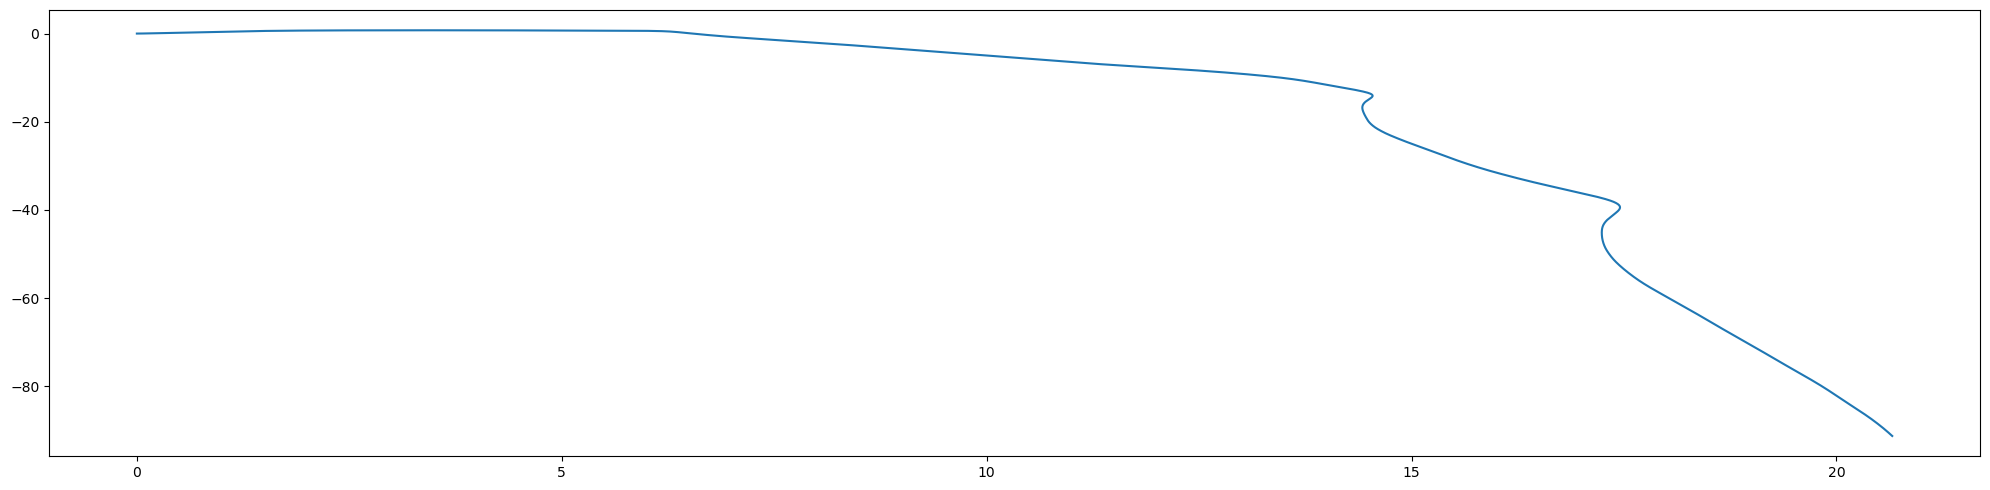

In [280]:
plt.plot(pos_x, pos_y)
plt.show() 

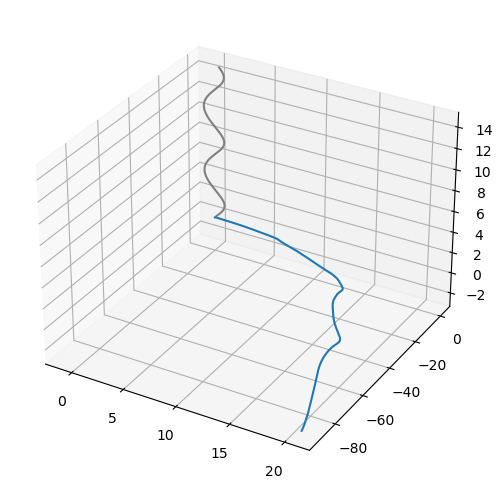

In [281]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = pos_z
xdata = pos_x
ydata = pos_y
ax.plot3D(xdata, ydata, zdata);

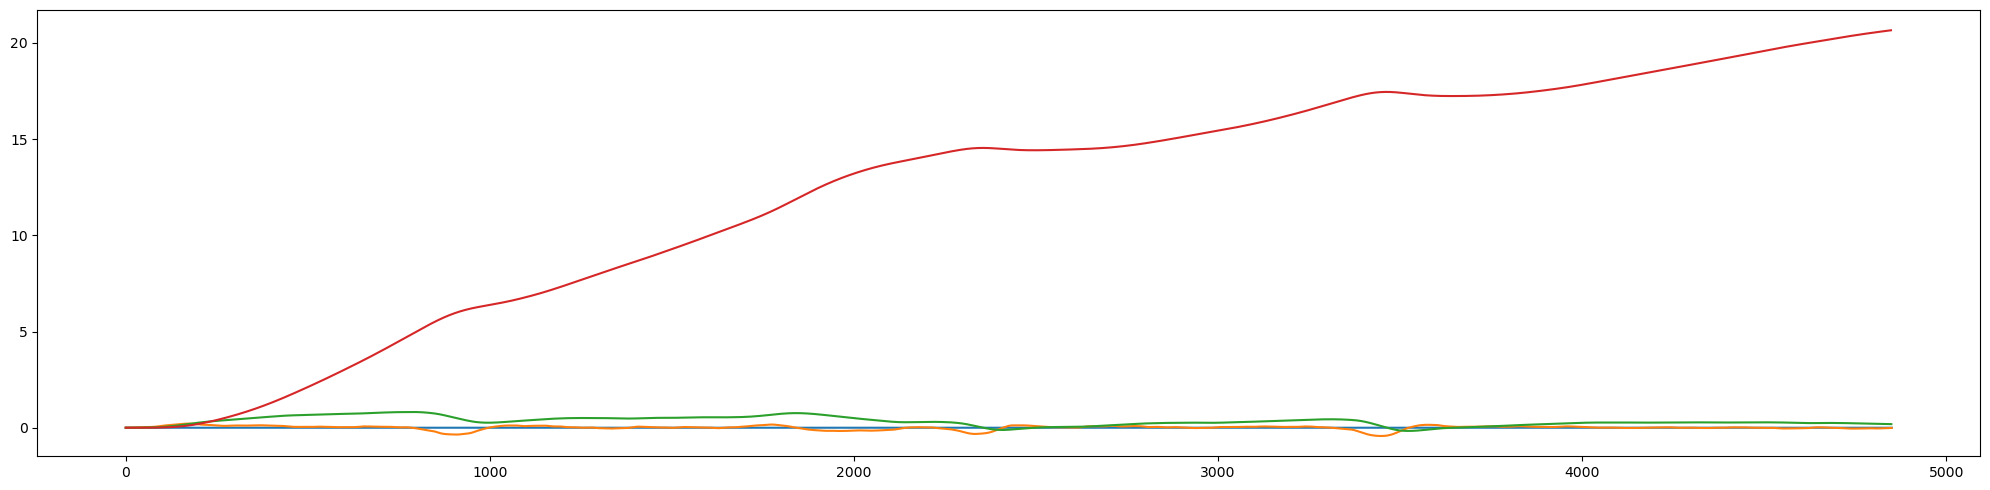

In [282]:
plt.plot(np.zeros((len(list_x))))

plt.plot(list_x)
plt.plot(velocities_x)
plt.plot(pos_x)

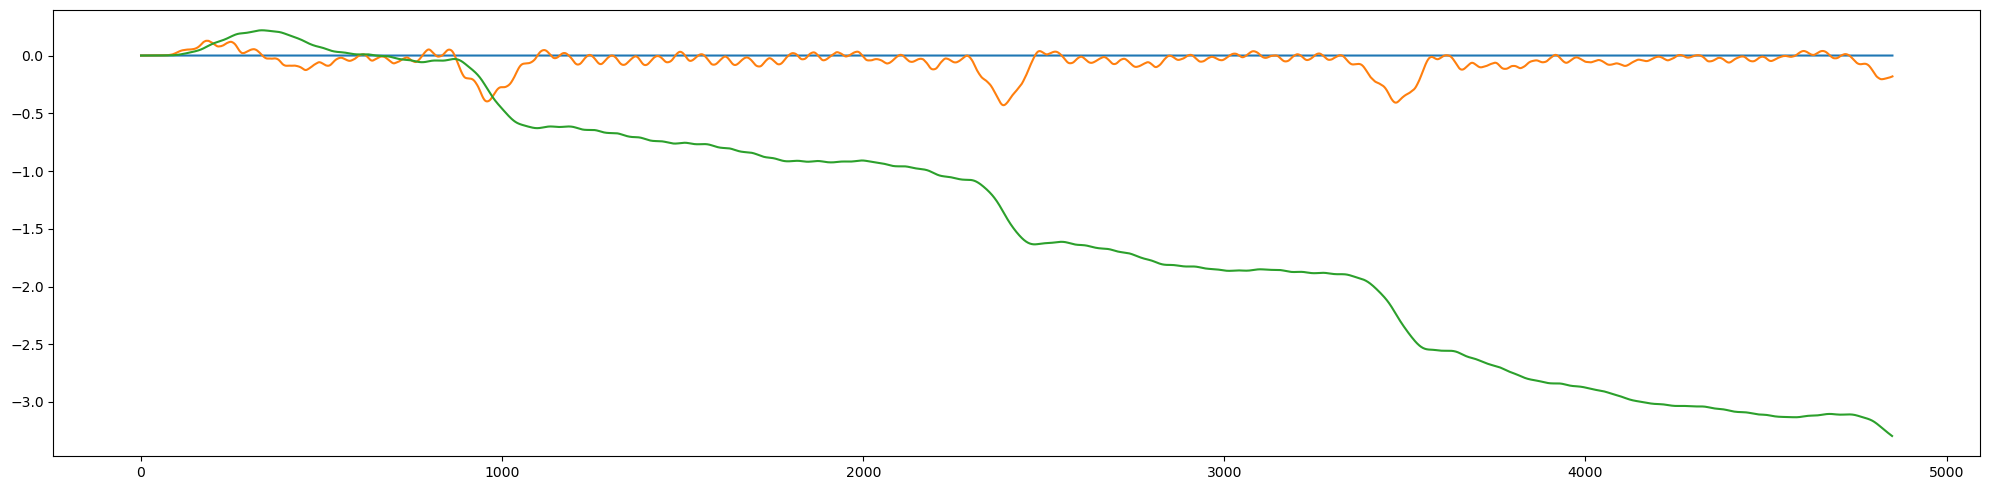

In [283]:
plt.plot(np.zeros((len(list_x))))

plt.plot(list_y)
plt.plot(velocities_y)
pos_y = -velocities_y[:4849]
#plt.plot(pos_y)

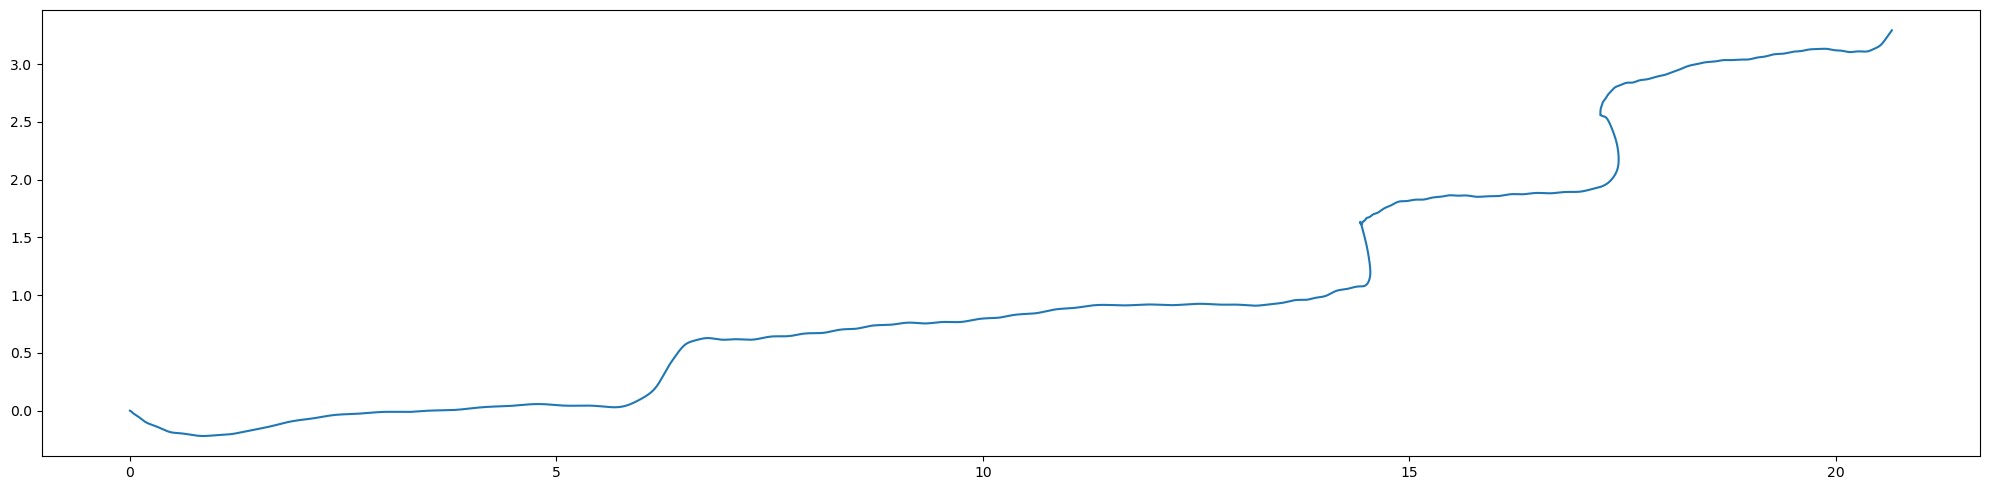

In [284]:
plt.plot(pos_x, -velocities_y[:4849])


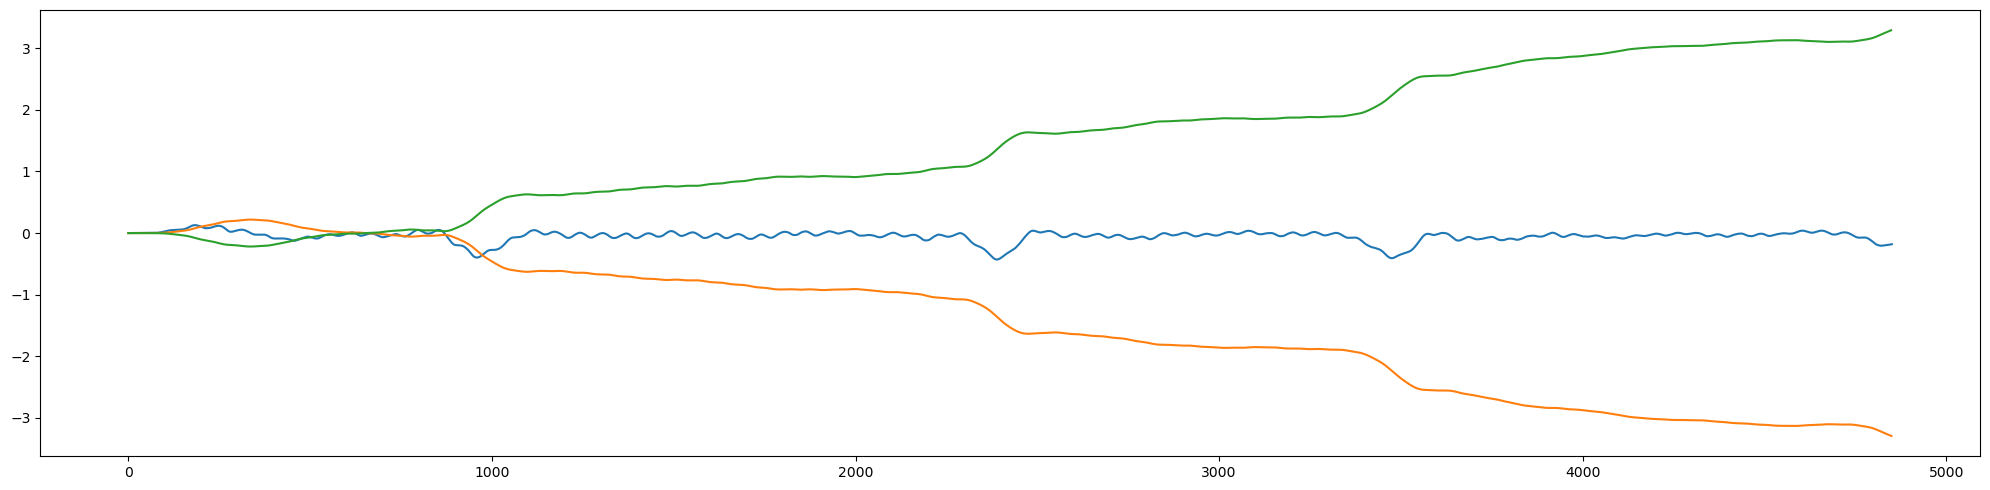

In [285]:
plt.plot(list_y)
plt.plot(velocities_y)
plt.plot(pos_y)

In [286]:
from scipy.signal import lfilter

n = 100  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

In [287]:
gyro_data = pd.read_csv("/home/santiago/imu_/data_for_plotting/Gyroscope.csv")
#pos_z = np.zeros(pos_z.shape)
#pos_y = np.zeros(pos_y.shape)

In [288]:
gyro_data

,time,seconds_elapsed,z,y,x
0,1721411575876789000,0.053789,0.032070,-0.057421,-0.053756
1,1721411575889659400,0.066659,0.034514,-0.009010,-0.086743
2,1721411575902510000,0.079510,0.037721,-0.103389,-0.118050
3,1721411575915380200,0.092380,-0.015424,-0.276722,-0.080329
4,1721411575928226600,0.105227,-0.071624,-0.254120,-0.093157
...,...,...,...,...,...
4850,1721411638634484200,62.811484,0.045357,0.086590,-0.107818
4851,1721411638647348500,62.824348,0.019548,0.150426,-0.130267
4852,1721411638660206300,62.837206,-0.017410,0.088575,-0.065973
4853,1721411638673065700,62.850066,-0.041997,-0.002291,0.009468


In [289]:
gyro_x = rot_vel_x = lfilter(b, a, lfilter(b, a, gyro_data.x.tolist()))
gyro_y = rot_vel_y = lfilter(b, a, lfilter(b, a, gyro_data.y.tolist()))
gyro_z = rot_vel_z = lfilter(b, a, lfilter(b, a, gyro_data.z.tolist()))

In [290]:
rot_vel_x = it.cumtrapz(gyro_x) * time_gap
rot_vel_y = it.cumtrapz(gyro_y) * time_gap
rot_vel_z = it.cumtrapz(gyro_z) * time_gap

In [291]:
rot_pos_x = it.cumtrapz(rot_vel_x) * time_gap
rot_pos_y = it.cumtrapz(rot_vel_y) * time_gap
rot_pos_z = it.cumtrapz(rot_vel_z) * time_gap

In [292]:
rot_pos_x = rot_vel_x
rot_pos_y = rot_vel_y
rot_pos_z = rot_vel_z

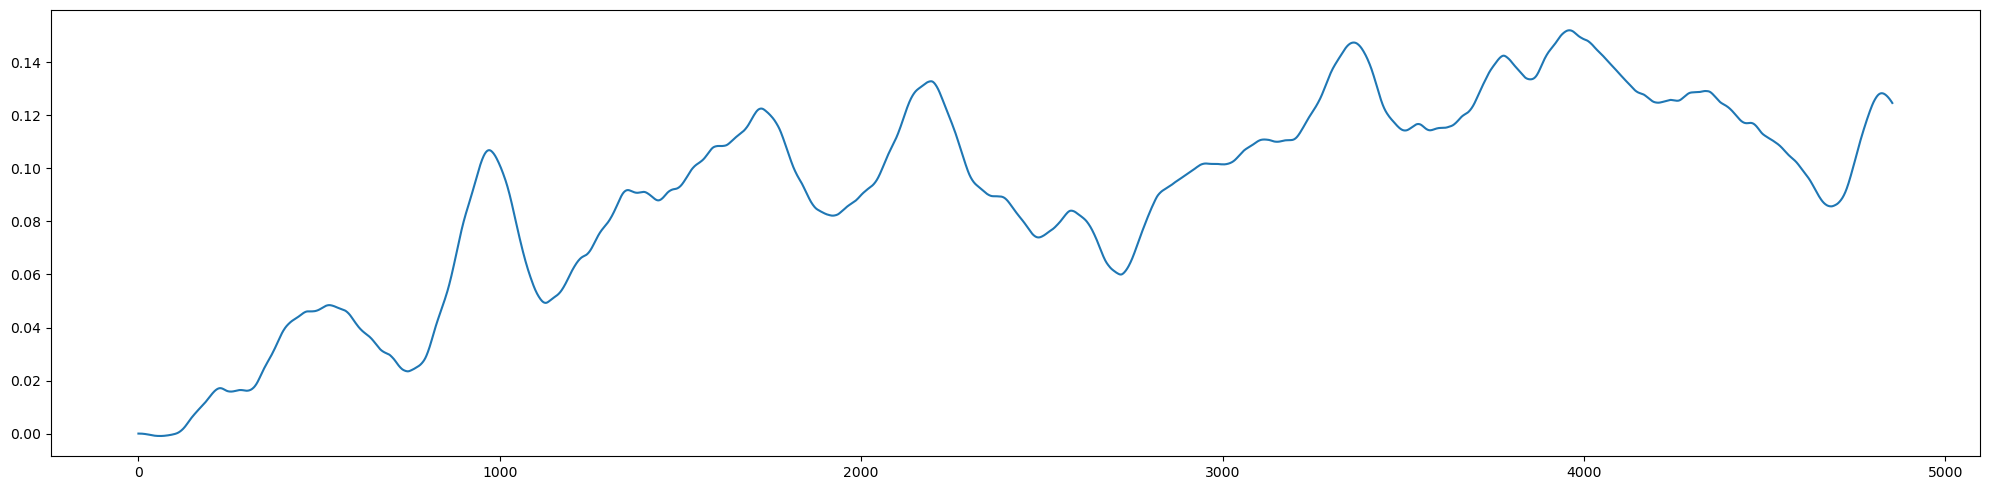

In [293]:
plt.plot(rot_pos_x)

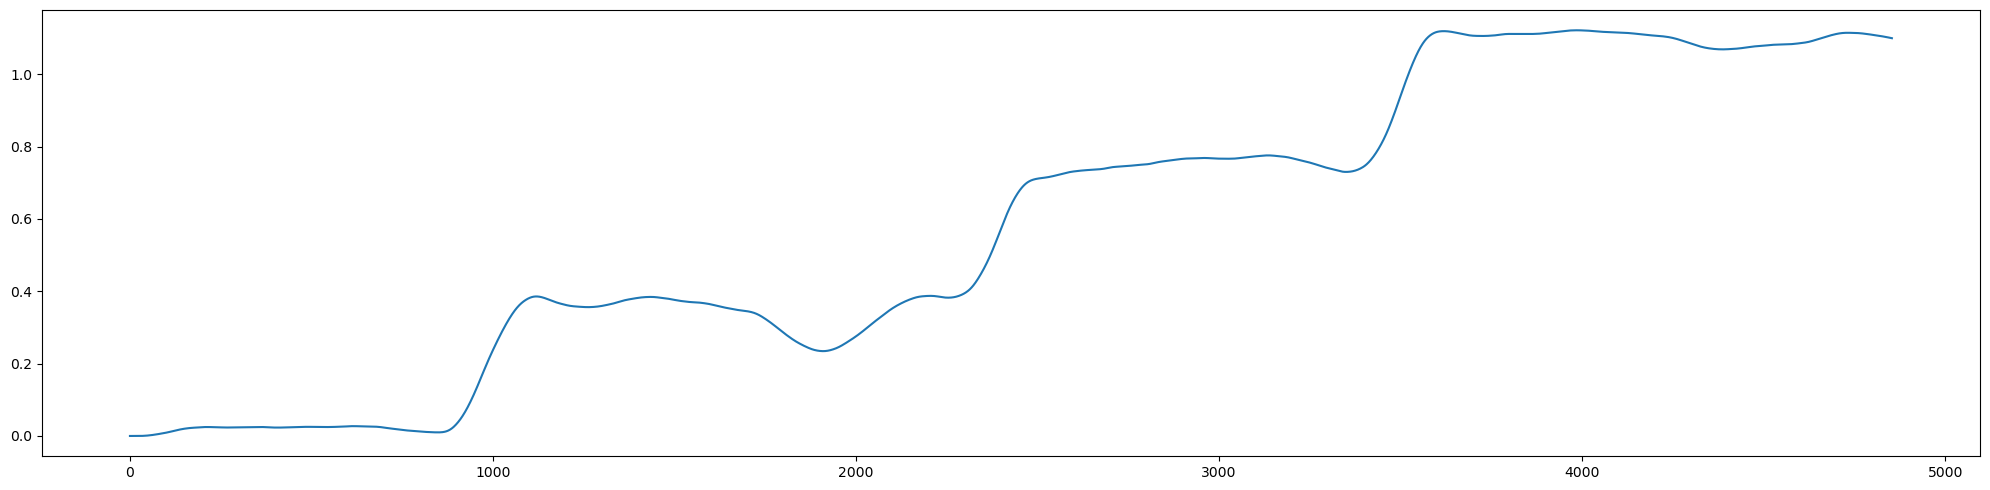

In [294]:
plt.plot(rot_pos_y)

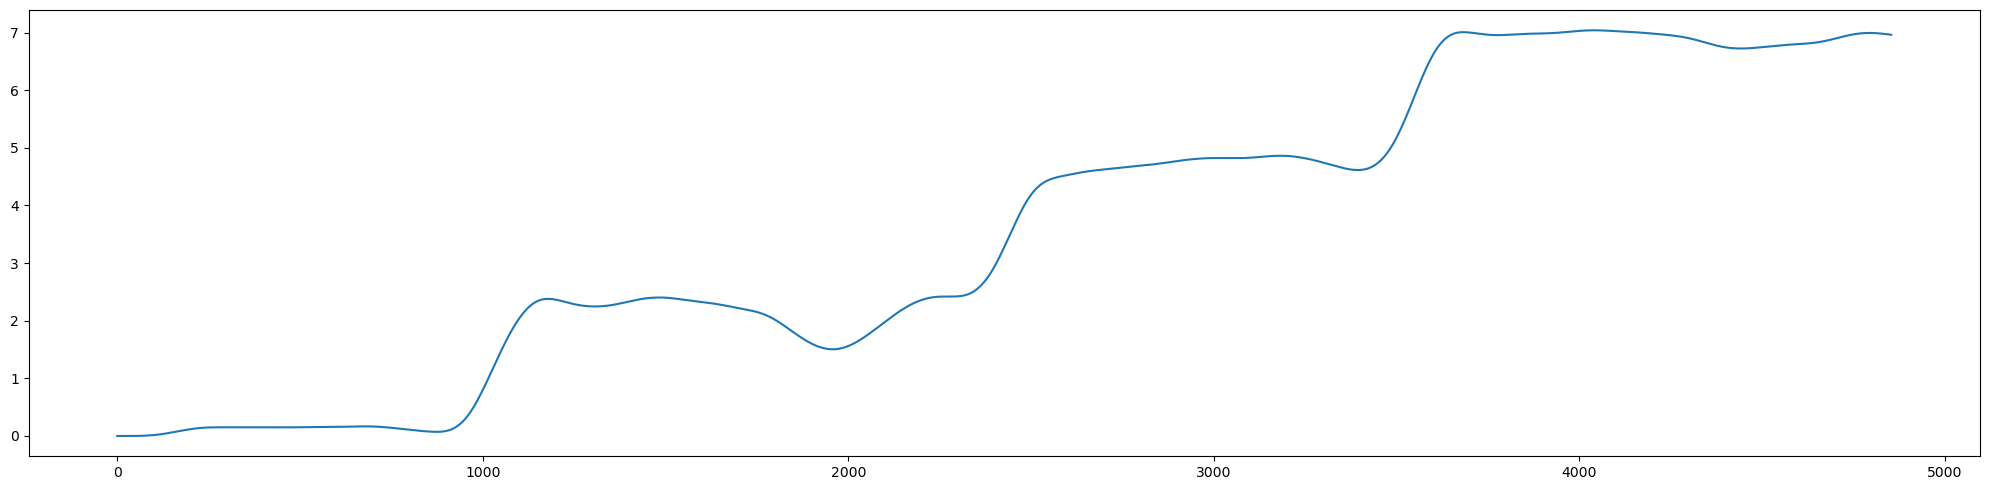

In [295]:
plt.plot(lfilter(b, a, rot_pos_y)*2*math.pi)


In [296]:
# Initialize positionChanges list
positionChanges = []

# Starting position
prev = [0, 0, 0]

# Calculate the changes in position
for x, y, z in zip(pos_x, pos_y, pos_z):
    vect_x = x - prev[0]
    vect_y = y - prev[1]
    vect_z = z - prev[2]
    
    # Append the changes to the positionChanges list
    positionChanges.append([vect_x, vect_y, vect_z])
    
    # Update prev to the current position
    prev = [x, y, z]


In [297]:
rot_pos_x = np.zeros(rot_pos_x.size)
rot_pos_z = np.zeros(rot_pos_z.size)

In [298]:
# Initialize rotationChanges list
rotationChanges = []

# Starting rotation
prev = [0, 0, 0]

# Calculate the changes in rotation
for x, y, z in zip(rot_pos_x, rot_pos_y, rot_pos_z):
    rot_vect_x = x - prev[0]
    rot_vect_y = y - prev[1]
    rot_vect_z = z - prev[2]
    
    # Append the changes to the rotationChanges list
    rotationChanges.append([rot_vect_x, rot_vect_y, rot_vect_z])
    
    # Update prev to the current rotation
    prev = [x, y, z]


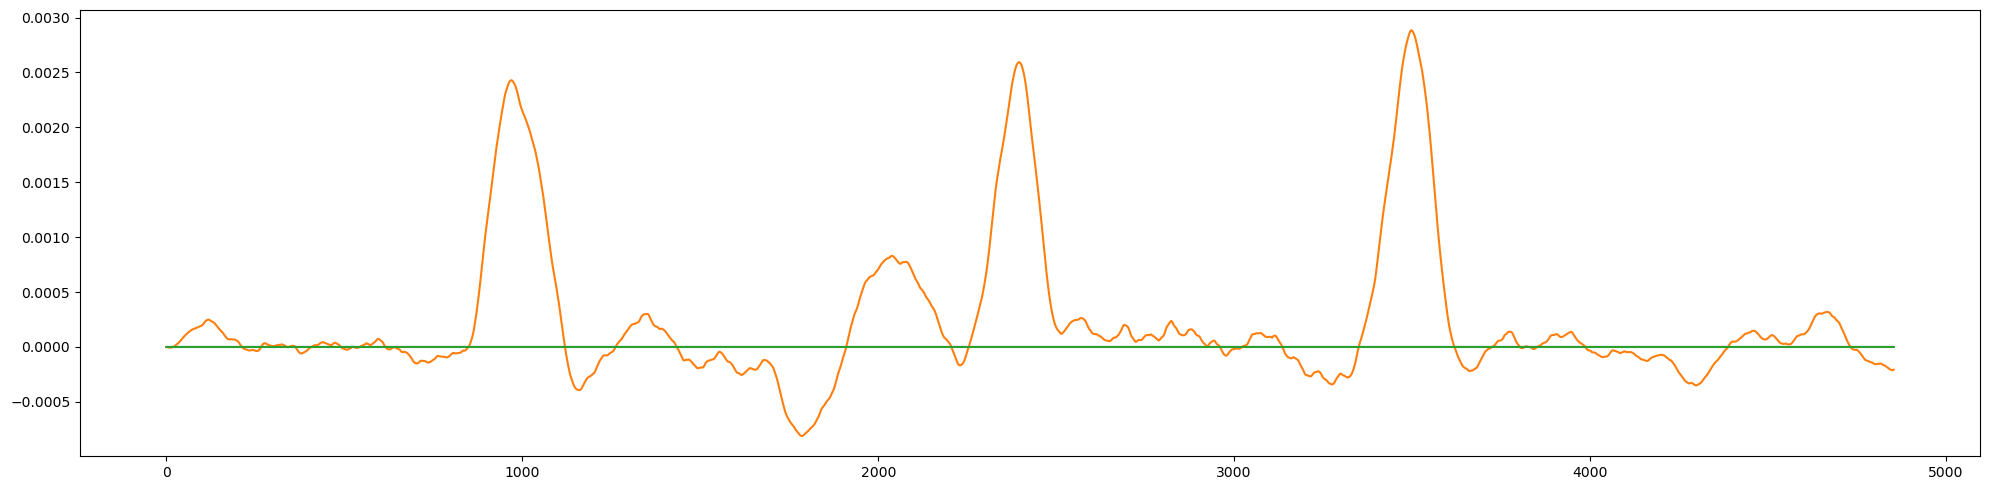

In [299]:
plt.plot(rotationChanges)

In [300]:

total_rotational_changes = []
pos_changes_absolute = []

for rotations, position_vectors in zip(rotationChanges, positionChanges):
    # Rotation matrix around the X axis
    rot_x = np.array([[1, 0, 0],
                      [0, math.cos(rotations[0]), -math.sin(rotations[0])],
                      [0, math.sin(rotations[0]), math.cos(rotations[0])]])
    
    # Rotation matrix around the Y axis
    rot_y = np.array([[math.cos(rotations[1]), 0, math.sin(rotations[1])],
                      [0, 1, 0],
                      [-math.sin(rotations[1]), 0, math.cos(rotations[1])]])
    
    # Rotation matrix around the Z axis
    rot_z = np.array([[math.cos(rotations[2]), -math.sin(rotations[2]), 0],
                      [math.sin(rotations[2]), math.cos(rotations[2]), 0],
                      [0, 0, 1]])
    
    # Combined rotation matrix
    total_rot = np.matmul(np.matmul(rot_z, rot_y), rot_x)
    total_rot = rot_y
    total_rotational_changes.append(total_rot)
    #print(total_rot)
    
    # Apply the rotation to the position vector
    position_vectors_abs = np.matmul(total_rot, position_vectors)
    pos_changes_absolute.append(position_vectors_abs)

pos_changes_absolute = np.array(pos_changes_absolute)


In [301]:
# Ensure pos_changes_absolute is a numpy array
pos_changes_absolute = np.array(pos_changes_absolute)

# Initialize final_path with the first position change
final_path = [pos_changes_absolute[0]]

# Iterate through the position changes and accumulate the positions
for i in range(1, len(pos_changes_absolute)):
    new_position = final_path[-1] + pos_changes_absolute[i]
    final_path.append(new_position)

# Convert final_path to a numpy array
final_path = np.array(final_path)

# Now final_path contains the overall changes as separate points to be plotted


In [302]:
print(final_path)

[[ 2.00040917e-08 -4.05708350e-07  3.71360345e-06]
 [ 6.98680649e-08 -1.39792917e-06  9.89355463e-06]
 [ 1.70453780e-07 -2.95723556e-06  1.85338926e-05]
 ...
 [ 2.06515331e+01  3.28740607e+00 -2.97640231e+00]
 [ 2.06539452e+01  3.28977515e+00 -2.97640952e+00]
 [ 2.06563553e+01  3.29212664e+00 -2.97641350e+00]]


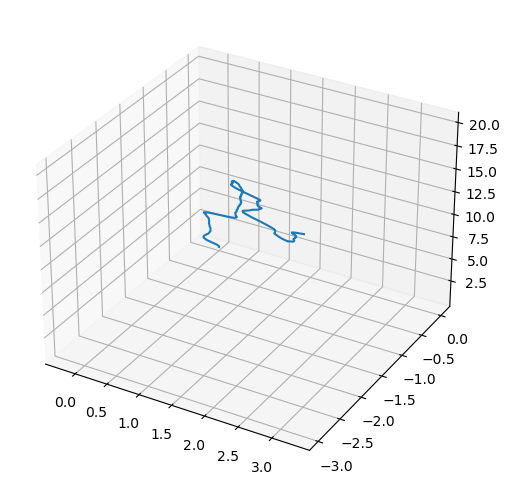

In [303]:
test = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
#test.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = final_path[:, 0]
xdata = final_path[:, 1]
ydata = final_path[:, 2]
test.plot3D(xdata, ydata, zdata);

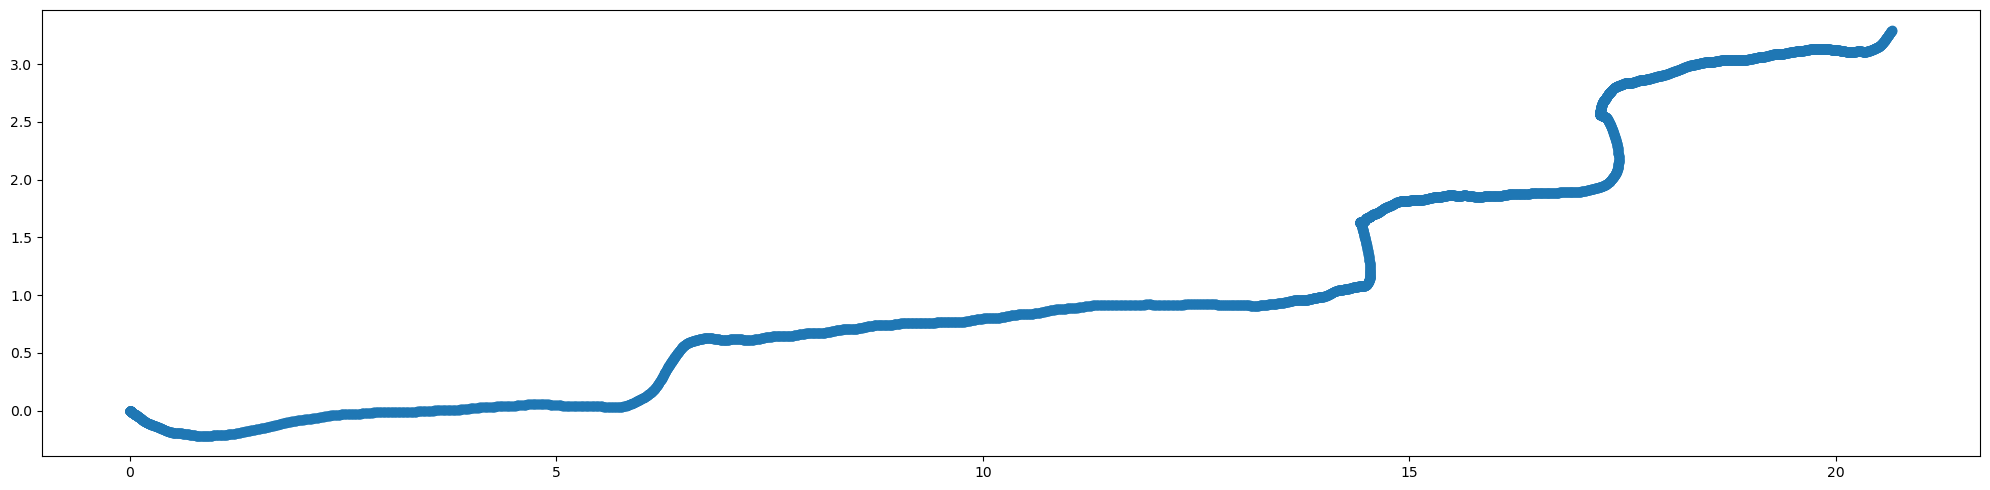

In [304]:
plt.scatter(final_path[:, 0], final_path[:, 1])